# Perceptron Learning Algorithm (PLA)

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Perceptron:
    def __init__(self, max_iter = 1000):
        self.coefficients = None
        self.max_iter = max_iter
    
    def fit(self, X, Y, W=None):
        n = X.shape[0]
        X = np.c_[np.ones(n), X]
        self.coefficients = W if W is not None else np.random.rand(X.shape[1])
        
        new_coeff = self.coefficients
        correct_classifications = 0
        i = 0
        while correct_classifications < n and i < self.max_iter:
            hypothesis = self.__sign(np.dot(new_coeff, X[i]))
            if hypothesis != Y[i]:
                new_coeff += X[i] * Y[i]
                correct_classifications = 1
            else:
                correct_classifications += 1
            self.coefficients = new_coeff
            i = (i + 1) % n
        return self
    
    def predict(self, X):
        X = np.r_[1, X]
        return self.__sign(np.dot(self.coefficients, X))
    
    def __sign(self, x):
        if x > 0:
            return 1
        elif x < 0:
            return -1
        # The value of sign(s) when s = 0 is a simple technicality that we ignore for the moment.

In [3]:
X = np.array([[0, 0], 
              [0, 1], 
              [1, 0], 
              [1, 1]])

# OR operation
Y = np.array([-1, 1, 1, 1])

W = np.array([0.5, -1, 1])

In [4]:
clf = Perceptron().fit(X, Y)
clf.coefficients

array([-0.60933623,  0.64439698,  1.58882296])

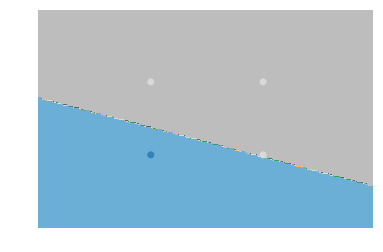

In [5]:
# https://stats.stackexchange.com/questions/71335/decision-boundary-plot-for-a-perceptron
import matplotlib.pyplot as plt

cmap = plt.cm.tab20c  # colormap
h = .02  # step size in the mesh

# Create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax = plt.subplots()
Z = np.apply_along_axis(clf.predict, 1, np.c_[xx.ravel(), yy.ravel()])

# Put the result into a colour plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cmap)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap)